In [1]:
import pandas as pd
import numpy as np
import matplotlib
import sklearn

In [2]:
print("pandas", pd.__version__)
print("numpy", np.__version__)
print("mpl", matplotlib.__version__)
print("sklearn", sklearn.__version__)

pandas 0.19.2
numpy 1.11.3
mpl 2.2.2
sklearn 0.19.1


In [3]:
from IPython.display import Image
%matplotlib inline

In [4]:
from sklearn import datasets
iris = datasets.load_iris()

In [5]:
X = iris.data[:, [2,3]]
y = iris.target

In [6]:
np.unique(y)

array([0, 1, 2])

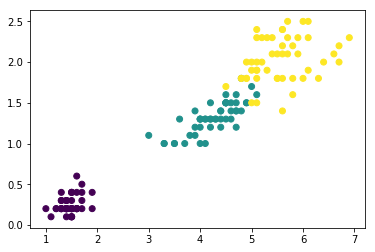

In [7]:
import matplotlib.pyplot as plt

_ = plt.scatter(X[:,0], X[:,1], c=y)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                        test_size=0.3, random_state=1, 
                                        stratify=y)

In [9]:
print("label counts in y: ", np.bincount(y))

label counts in y:  [50 50 50]


In [10]:
np.bincount(y_train), np.bincount(y_test)

(array([35, 35, 35], dtype=int64), array([15, 15, 15], dtype=int64))

In [11]:
from sklearn.preprocessing import StandardScaler
#### StandardScaler?

In [12]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

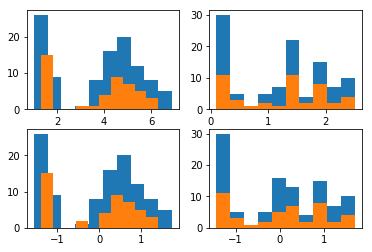

In [13]:
fig, axes = plt.subplots(ncols=2, nrows=2)
_ = axes[0,0].hist(X_train[:,0], label="train")
_ = axes[0,0].hist(X_test[:,0], label="test")
_ = axes[0,1].hist(X_train[:,1], label="train")
_ = axes[0,1].hist(X_test[:,1], label="test")
_ = axes[1,0].hist(X_train_std[:,0], label="train")
_ = axes[1,0].hist(X_test_std[:,0], label="test")
_ = axes[1,1].hist(X_train_std[:,1], label="train")
_ = axes[1,1].hist(X_test_std[:,1], label="test")

In [14]:
from sklearn.linear_model import Perceptron

In [15]:
ppn = Perceptron(n_iter=40, eta0=.1, random_state=1)

In [16]:
ppn

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=None, n_iter=40, n_jobs=1, penalty=None, random_state=1,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [17]:
ppn.fit(X_train_std, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=None, n_iter=40, n_jobs=1, penalty=None, random_state=1,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [18]:
y_pred = ppn.predict(X_test_std)

In [19]:
"Missclassified: ", (y_test!=y_pred).sum()

('Missclassified: ', 3)

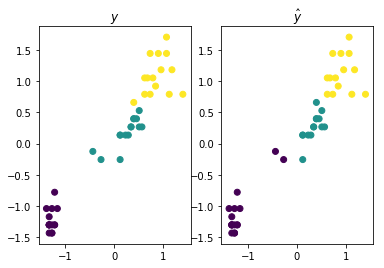

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
_ = ax1.set_title("$y$")
_ = ax2.set_title("$\hat{y}$")
_ = ax1.scatter(X_test_std[:,0], X_test_std[:,1], c=y_test)
_ = ax2.scatter(X_test_std[:,0], X_test_std[:,1], c=y_pred)

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(y_test, y_pred)

0.93333333333333335

In [23]:
ppn.score(X_test_std, y_test)

0.93333333333333335

In [24]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [25]:
X_combined_std = np.vstack((X_train_std, X_test_std))
X_combined_std.shape

(150, 2)

In [26]:
y_combined = np.hstack((y_train, y_test))
y_combined.shape

(150,)

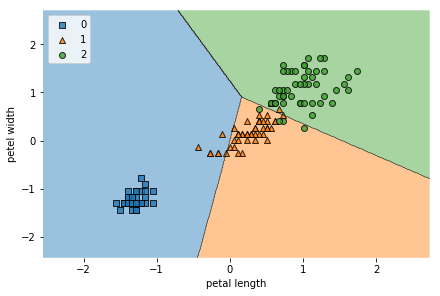

In [27]:
fig, ax = plt.subplots(constrained_layout=True)
plot_decision_regions(X=X_combined_std, y=y_combined, clf=ppn, ax=ax)
_ = ax.set_xlabel("petal length")
_ = ax.set_ylabel("petel width")
_ = ax.legend(loc='upper left')


In [28]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

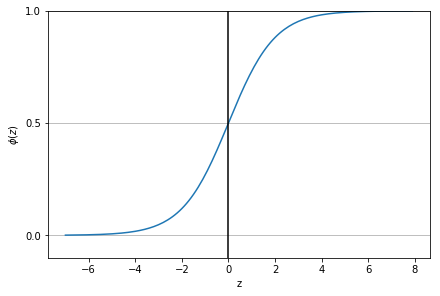

In [29]:
z = np.arange(-7, 8, 0.1)
phi_z = sigmoid(z)

fig, ax = plt.subplots(constrained_layout=True)
ax.plot(z, phi_z)
ax.axvline(0.0, color='k')
ax.set_ylim(-0.1, 1.0)
ax.set_ylabel('$\phi (z)$')
ax.set_xlabel('z')
ax.set_yticks([0.0, 0.5, 1.0])
ax.yaxis.grid(True)



In [30]:
def cost_1(z):
    return -np.log(sigmoid(z))

def cost_0(z):
    return -np.log(1-sigmoid(z))

In [31]:
z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
c0 = [cost_0(x) for x in z]

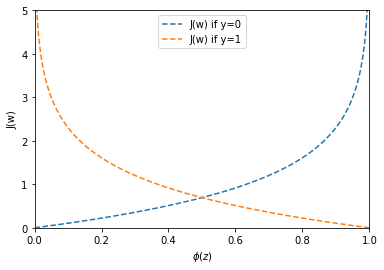

In [32]:
fig, ax = plt.subplots()
_ = ax.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')
_ = ax.plot(phi_z, c1, linestyle='--', label='J(w) if y=1')
_ = ax.legend()
_ = ax.set_ylim([0, 5])
_ = ax.set_xlim([0,1])
_ = ax.set_xlabel("$\phi(z)$")
_ = ax.set_ylabel("J(w)")


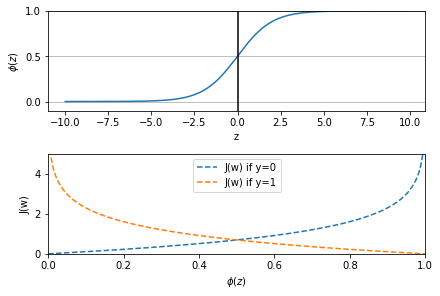

In [33]:
#https://en.wikipedia.org/wiki/Logistic_regression
fig, (ax1, ax2) = plt.subplots(nrows=2, constrained_layout=True)
_ = ax1.plot(z, phi_z)
_ = ax1.axvline(0.0, color='k')
_ = ax1.set_ylim(-0.1, 1.0)
_ = ax1.set_ylabel('$\phi (z)$')
_ = ax1.set_xlabel('z')
_ = ax1.set_yticks([0.0, 0.5, 1.0])
_ = ax1.yaxis.grid(True)

_ = ax2.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')
_ = ax2.plot(phi_z, c1, linestyle='--', label='J(w) if y=1')
_ = ax2.legend()
_ = ax2.set_ylim([0, 5])
_ = ax2.set_xlim([0,1])
_ = ax2.set_xlabel("$\phi(z)$")
_ = ax2.set_ylabel("J(w)")


In [34]:
X_train_01_subset = X_train[(y_train==0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train==0) | (y_train==1)]

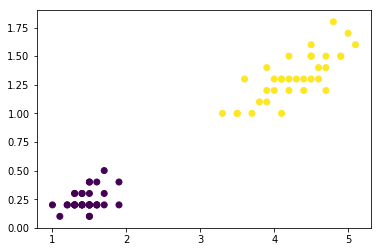

In [35]:
_ = plt.scatter(X_train_01_subset[:,0], X_train_01_subset[:,1], 
            c=y_train_01_subset)

In [36]:
from sklearn.linear_model import LogisticRegression

lrgd = LogisticRegression(C=100.0, random_state=1)
lrgd

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [37]:
lrgd.fit(X_train_01_subset, y_train_01_subset)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Text(0,0.5,'width')

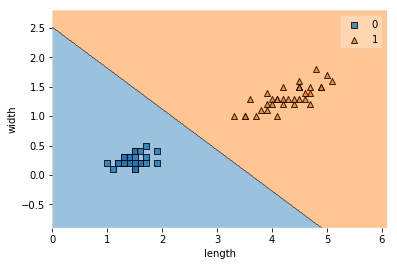

In [38]:
plot_decision_regions(X_train_01_subset, y_train_01_subset, clf=lrgd)
plt.xlabel("length")
plt.ylabel("width")

In [39]:
lr = LogisticRegression(C=100.0, random_state=1)

In [40]:
lr.fit(X_train_std, y_train)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Text(0,0.5,'width')

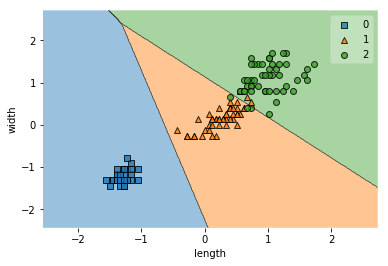

In [41]:
plot_decision_regions(X_combined_std, y_combined, lr)
plt.xlabel("length")
plt.ylabel("width")

In [42]:
lr.score(X_test_std, y_test)

0.97777777777777775

In [43]:
lr.predict_proba(X_test_std)

array([[  3.20136878e-08,   1.46953648e-01,   8.53046320e-01],
       [  8.34428069e-01,   1.65571931e-01,   4.57896429e-12],
       [  8.49182775e-01,   1.50817225e-01,   4.65678779e-13],
       [  4.99230003e-05,   6.43956438e-01,   3.55993639e-01],
       [  3.51636768e-04,   9.72504205e-01,   2.71441581e-02],
       [  2.62495593e-03,   9.95407768e-01,   1.96727650e-03],
       [  1.14536052e-07,   3.65591449e-01,   6.34408437e-01],
       [  1.48685830e-04,   9.07152663e-01,   9.26986513e-02],
       [  3.69585130e-07,   2.61918720e-01,   7.38080911e-01],
       [  8.87771336e-01,   1.12228664e-01,   5.80934999e-13],
       [  8.62786747e-01,   1.37213253e-01,   1.63398273e-12],
       [  2.97931176e-06,   2.86898935e-01,   7.13098086e-01],
       [  8.19659358e-01,   1.80340642e-01,   2.21533361e-13],
       [  1.18552744e-01,   8.81441692e-01,   5.56385690e-06],
       [  8.19659358e-01,   1.80340642e-01,   2.21533361e-13],
       [  6.62867745e-05,   8.61301150e-01,   1.3863256

In [44]:
lr.predict_proba(X_test_std).sum(axis=1)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.])

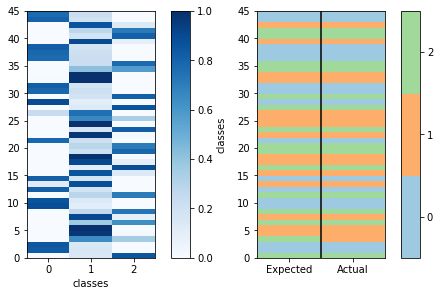

In [45]:
import matplotlib.colors as mcolors
import matplotlib.cm as mcm

fig, (ax1, ax2) = plt.subplots(ncols=2, constrained_layout=True)

pnorm = mcolors.Normalize(vmin=0, vmax=1)
pcmap = mcm.Blues
im = ax1.pcolormesh(lr.predict_proba(X_test_std), norm=pnorm, cmap=pcmap)
_ = ax1.set_xticks([.5, 1.5, 2.5])
_ = ax1.set_xticklabels([0,1,2])
_ = ax1.set_xlabel("classes")

ccmap = mcolors.ListedColormap([mcm.tab20c(2), mcm.tab20c(6), mcm.tab20c(10)])
cnorm = mcolors.BoundaryNorm([-.5, .5, 1.5, 2.5], ccmap.N)
im2 = ax2.pcolormesh(np.vstack([y_test, lr.predict(X_test_std)]).T, 
                               cmap=ccmap, norm=cnorm)
ax2.set_xticks([.5, 1.5])
ax2.set_xticklabels(["Expected", "Actual"])
ax2.axvline(x=1, color='k')
cb = fig.colorbar(im, ax=ax1)
_ = cb.set_label("p(being in class)")
cb2 = fig.colorbar(im2, ax=ax2)
cb2.set_ticks([0,1,2])
cb.set_label("classes")


In [46]:
mi = (y_test != lr.predict(X_test_std)).nonzero()[0][0]
mx, my = X_test_std[mi].squeeze()
mx, my, mi

(0.3962503593498341, 0.65938062706551193, 3)

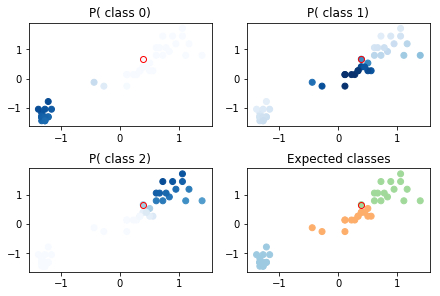

In [47]:
import matplotlib.colors as mcolors
pp = lr.predict_proba(X_test_std)
fig, axes = plt.subplots(ncols=2, nrows=2, constrained_layout=True)
for i, ax in enumerate(axes.flatten()):
    if i == 3:
        colors = y_test
        cmap = ccmap
        norm = cnorm
        title = "Expected classes"
    else: 
        colors = pp[:,i]
        norm = pnorm
        cmap = pcmap
        title = f"P( class {i})"
        
    _ = ax.set_title(title)   
    im = ax.scatter(X_test_std[:,0], X_test_std[:, 1], c=colors, cmap=cmap, norm=norm)
    _ = ax.scatter(mx, my, color=cmap(norm(colors[mi])), edgecolor='Red')

In [48]:
lr.predict_proba(X_test_std).argmax(axis=1)

array([2, 0, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0, 1,
       2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0, 0], dtype=int64)

In [49]:
y_test

array([2, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0, 1,
       2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0, 0])

In [50]:
(lr.predict_proba(X_test_std).argmax(axis=1)!=y_test).sum()

1

In [51]:
(lr.predict_proba(X_test_std).argmax(axis=1)!=lr.predict(X_test_std)).sum()

0

In [52]:
axes.shape

(2, 2)

In [53]:
axes.flatten().shape

(4,)